# KMEAN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

#import numpy as np
#from numpy import unique
#from numpy import where

from kneed import KneeLocator

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

# Load the data

In [3]:
AimoScoreFileUrl = "../../datasets/AimoScore_WeakLink_big_scores.xls"
WeakLinksFileUrl = "../../datasets/20190108 scores_and_weak_links.xlsx"

try:
    AimoScore = pd.read_excel(AimoScoreFileUrl, engine=None)
    WeakLinks = pd.read_excel(WeakLinksFileUrl, engine='openpyxl')

except IOError as e:
    print(e)

In [4]:
print("AimoScore size: {}".format(len(AimoScore)))
print("WeakLinks size: {}".format(len(WeakLinks)))
result = pd.merge(AimoScore, WeakLinks,on=["ID"])
print("result size: {}".format(len(result)))

AimoScore size: 2094
WeakLinks size: 2096
result size: 2094


In [5]:
result["WeakLinks"] = result.loc[:,"ForwardHead":"RightHeelRises"].idxmax(axis=1)

In [6]:
result.drop(result.columns.to_series()["ForwardHead":"RightHeelRises"], axis=1, inplace=True)

In [7]:
result = result.drop_duplicates(subset="ID")

In [8]:
result["WeakLinks"].value_counts()

LeftArmFallForward              628
RightArmFallForward             472
RightKneeMovesOutward           276
RightShoulderElevation          250
ForwardHead                     115
ExcessiveForwardLean            100
LeftAsymmetricalWeightShift      73
LeftShoulderElevation            58
LeftKneeMovesOutward             49
RightKneeMovesInward             45
RightAsymmetricalWeightShift     19
LeftKneeMovesInward               3
LeftHeelRises                     2
RightHeelRises                    1
Name: WeakLinks, dtype: int64

In [9]:
result

,AimoScore,No_1_Angle_Deviation,No_2_Angle_Deviation,No_3_Angle_Deviation,No_4_Angle_Deviation,No_5_Angle_Deviation,No_6_Angle_Deviation,No_7_Angle_Deviation,No_8_Angle_Deviation,No_9_Angle_Deviation,...,No_23_NASM_Deviation,No_24_NASM_Deviation,No_25_NASM_Deviation,No_1_Time_Deviation,No_2_Time_Deviation,EstimatedScore,ID,Date,SCORE,WeakLinks
0,0.323667,0.538020,0.815878,0.346724,0.382114,0.302248,0.947872,0.275945,0.521760,0.457198,...,0.648972,0.578192,0.560019,0.821616,0.818747,0.209947,0003cdcc-86ed-494a-a3b5-90d09e96e06b.Kinect,2018-08-23,0.323667,RightShoulderElevation
1,0.323699,0.443807,0.306552,0.823529,0.188905,0.497370,0.140124,0.664275,0.521760,0.729316,...,0.848876,0.889048,0.816834,0.307987,0.248207,0.457198,003115c4-bdb8-491c-b571-8fcebdecf8ed.Kinect,2018-10-24,0.323699,RightArmFallForward
2,0.848327,0.603539,0.373984,0.346724,0.590626,0.341942,0.298900,0.276901,0.623625,0.658058,...,0.648972,0.578192,0.555715,0.218556,0.235294,0.107126,00316bfb-ed43-489f-a55b-11c7f01c852d.Kinect,2018-05-09,0.848327,LeftArmFallForward
3,0.351332,0.484935,0.623625,0.380201,0.975132,0.509326,0.888570,0.363462,0.847441,0.237207,...,0.648972,0.578192,0.744620,0.458154,0.432807,0.612626,00607608-6f2f-459b-a69d-e14067489459.Kinect,2018-06-06,0.351332,RightShoulderElevation
4,0.627181,0.860832,0.657580,0.745576,0.552846,0.375897,0.483022,0.388331,0.521760,0.387853,...,0.648972,0.578192,0.308943,0.805356,0.774271,0.153515,007396ec-3463-4a05-915c-02244ff8d3de.Kinect,2018-06-06,0.627181,ForwardHead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,0.665494,0.576279,0.396939,0.786705,0.646581,0.633668,0.140124,0.690579,0.521760,0.354376,...,0.795313,0.578192,0.815878,0.150167,0.163558,0.633190,feca4c0e-cbc7-4e5e-b85c-8befedbc65a4.Kinect,2018-05-31,0.665494,RightArmFallForward
2087,0.830883,0.788140,0.900526,0.628886,0.414634,0.689144,0.224773,0.516978,0.521760,0.156385,...,0.667145,0.578192,0.308943,0.148733,0.151124,0.207078,fed923af-f41e-42bc-8799-3a9f8a5f2129.Kinect,2018-10-18,0.830883,LeftArmFallForward
2088,0.527640,0.575323,0.193687,0.780488,0.956958,0.740794,0.912482,0.630799,0.632233,0.708274,...,0.648972,0.578192,0.736011,0.764706,0.811095,0.911047,ff015ddd-c9fb-49e3-8e33-abbf72e8b120.Kinect,2018-09-19,0.527640,LeftArmFallForward
2090,0.407197,0.279770,0.131038,0.346724,0.317073,0.945481,0.646581,0.913439,0.521760,0.570540,...,0.648972,0.749880,0.943568,0.684840,0.711621,0.877571,ff514cba-6c5e-41a9-9936-3e8400565c8d.Kinect,2018-10-09,0.407197,RightKneeMovesOutward


In [10]:
result = result.drop(
    columns=[
        "AimoScore",
        "ID",
        "Date",
        "EstimatedScore",
        "SCORE"
    ]
)



for col in result.columns:
    print(col)

No_1_Angle_Deviation
No_2_Angle_Deviation
No_3_Angle_Deviation
No_4_Angle_Deviation
No_5_Angle_Deviation
No_6_Angle_Deviation
No_7_Angle_Deviation
No_8_Angle_Deviation
No_9_Angle_Deviation
No_10_Angle_Deviation
No_11_Angle_Deviation
No_12_Angle_Deviation
No_13_Angle_Deviation
No_1_NASM_Deviation
No_2_NASM_Deviation
No_3_NASM_Deviation
No_4_NASM_Deviation
No_5_NASM_Deviation
No_6_NASM_Deviation
No_7_NASM_Deviation
No_8_NASM_Deviation
No_9_NASM_Deviation
No_10_NASM_Deviation
No_11_NASM_Deviation
No_12_NASM_Deviation
No_13_NASM_Deviation
No_14_NASM_Deviation
No_15_NASM_Deviation
No_16_NASM_Deviation
No_17_NASM_Deviation
No_18_NASM_Deviation
No_19_NASM_Deviation
No_20_NASM_Deviation
No_21_NASM_Deviation
No_22_NASM_Deviation
No_23_NASM_Deviation
No_24_NASM_Deviation
No_25_NASM_Deviation
No_1_Time_Deviation
No_2_Time_Deviation
WeakLinks


In [11]:
data = result.copy()

## K = 2

In [12]:
#data_left_right['WeakLinks'] = data_left_right.WeakLinks.map({'LeftArmFallForward':0, 'RightArmFallForward':1, 'RightKneeMovesOutward':1, 'RightShoulderElevation':1, 'ForwardHead':2, 'ExcessiveForwardLean':3, 'LeftAsymmetricalWeightShift':0, 'LeftShoulderElevation':0, 'LeftKneeMovesOutward':0, 'RightKneeMovesInward':1, 'RightAsymmetricalWeightShift':1})

In [13]:
data_k_2 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [14]:
clustering_kmeans = KMeans(n_clusters=2)
data_k_2['clusters'] = clustering_kmeans.fit_predict(data_k_2)

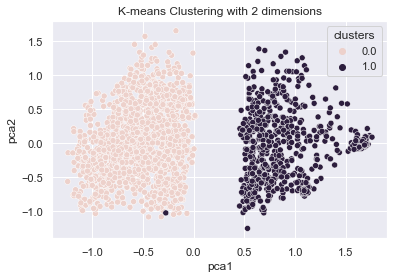

In [15]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_2['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## K = 3

In [16]:
data_k_3 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [17]:
clustering_kmeans = KMeans(n_clusters=3)
data_k_3['clusters'] = clustering_kmeans.fit_predict(data_k_3)

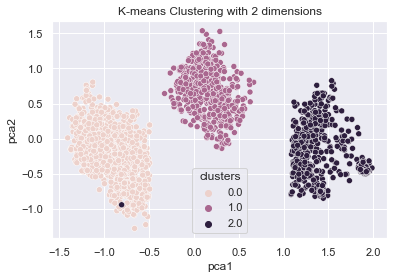

In [18]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_3)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_3['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

## K = 14

In [19]:
data_k_14 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [20]:
clustering_kmeans = KMeans(n_clusters=14)
data_k_14['clusters'] = clustering_kmeans.fit_predict(data_k_14)

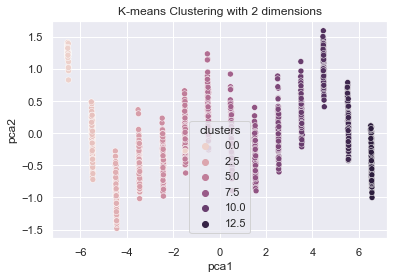

In [21]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_14)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_14['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [22]:
## Find K

In [23]:
data_k_0 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [24]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_k_0)
    sse.append(kmeans.inertia_)

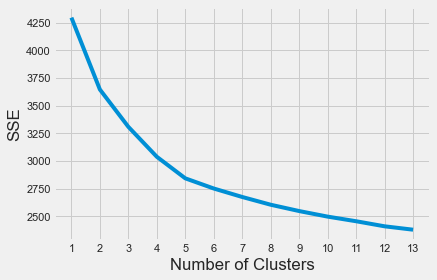

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 14), sse)
plt.xticks(range(1, 14))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
kl = KneeLocator(range(1, 14), sse, curve="convex", direction="decreasing")
kl.elbow

5

## K = 5

In [27]:
data_k_5 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [28]:
clustering_kmeans = KMeans(n_clusters=5)
data_k_5['clusters'] = clustering_kmeans.fit_predict(data_k_5)

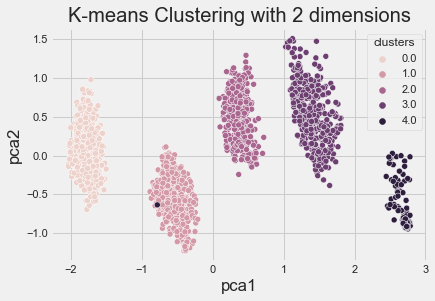

In [29]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_5)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_5['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()